### Examining relationships in spedific vendors within the vendor payments dataset. 

In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# import csv data
files = glob.glob('data/cleaned_data/*.csv')

payments = pd.concat([pd.read_csv(f, dtype={'commitmt_item_name': 'str', 'dept._descrptn': 'str', 'vendor_name': 'str'}) \
                      for f in files], sort=True)

In [13]:
# examine data types that have been imported
payments.dtypes

check/payment_date    datetime64[ns]
commitmt_item_name            object
dept._descrptn                object
invoice_net_amt              float64
vendor_name                   object
dtype: object

In [7]:
payments.head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,vendor_name
0,2014-01-02,Inventories,Street Transportation,-34.78,3M COMPANY
1,2014-01-02,Inventories,Street Transportation,-69.55,3M COMPANY
2,2014-01-02,Inventories,Street Transportation,-77.00,3M COMPANY
3,2014-01-02,Inventories,Public Works,0.01,AGS SAFETY & SUPPLY
4,2014-01-02,Inventories,Police,-0.79,AMERICAN EUROCOPTER CORPORATION


In [4]:
# convert check/payment date into datetime, it was imported as an object

payments.iloc[:,0] = pd.to_datetime(payments.iloc[:,0])

In [5]:
# examine date range of data
print(payments.iloc[:,0].min())
print(payments.iloc[:,0].max())

2014-01-02 00:00:00
2018-12-31 00:00:00


In [7]:
# create Day_of_Year column to perform time series analysis over the year
payments['day_of_year'] = payments['check/payment_date'].dt.dayofyear

In [26]:
# find top vendors based on amounts paid over the year
top_vendors_by_payment_amount = payments.groupby('vendor_name')['invoice_net_amt'].sum() \
    .apply(lambda x: int(x/1000000)) \
    .sort_values(ascending=False) \
    .head(15)
top_vendors_by_payment_amount

vendor_name
US BANK TRUST NATIONAL ASSOCIATION    2710
VALLEY METRO RAIL INC                  440
TRANSDEV SERVICE INC                   437
HUNT AUSTIN A JOINT VENTURE            426
ARIZONA PUBLIC SERVICE CO              227
REGIONAL PUBLIC TRANSPORTATION         216
FIRST TRANSIT INC                      151
CENTRAL ARIZONA PROJECT                135
KIEWIT INFRASTRUCTURE WEST CO          110
GILLIG LLC                             102
PCL CONSTRUCTION INC                    98
JP MORGAN CHASE BANK                    95
HENSEL PHELPS CONSTRUCTION CO           93
NEW FLYER OF AMERICA                    91
TALIS CONSTRUCTION CORPORATION          91
Name: invoice_net_amt, dtype: int64

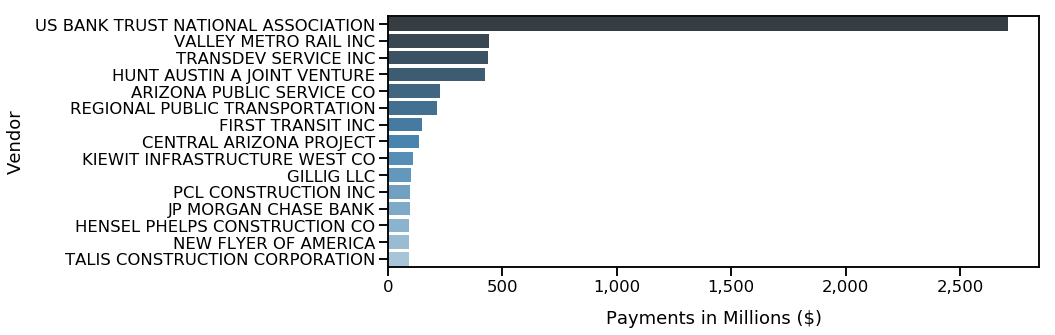

In [69]:
plt.subplots(figsize=(15,5))

sns.set_context('talk')
ax = sns.barplot(top_vendors_by_payment_amount.values, top_vendors_by_payment_amount.index, palette="Blues_d")

# plt.title('City of Phoenix Payments by Vendor',fontsize=20)
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Payments in Millions ($)', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

# plt.savefig("visualizations/top_vendors_payment_amt.png")

In [28]:
# which vendors have the highest volume of payments?
high_volume_vendors = payments.groupby('vendor_name')['invoice_net_amt'].count() \
    .sort_values(ascending=False) \
    .head(15)
high_volume_vendors

vendor_name
WIST OFFICE PRODUCTS CO              134624
GRAINGER                              76549
ARIZONA UNIFORM & APPAREL             50687
ARIZONA PUBLIC SERVICE CO             40991
COURTESY CHEVROLET                    31967
WAXIE SANITARY SPLY                   30140
STAR DISTRIBUTING CO                  29767
MISSION UNIFORM SERVICES              26634
COMMUNITY TIRE PROS & AUTO REPAIR     25742
BROWNS PARTSMASTER INC                24902
CREATIVE COMMUNICATIONS               22904
WESCO                                 21115
ELECTRIC SUPPLY INC                   18222
SIX POINTS HARDWARE/ELEC              17823
NATIONAL FIRE CONTROL                 17787
Name: invoice_net_amt, dtype: int64

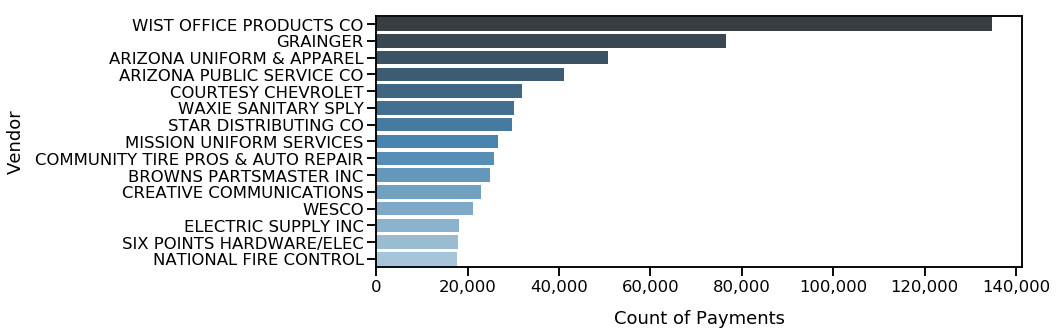

In [65]:
plt.subplots(figsize=(15,5))
sns.set_context('talk')
ax = sns.barplot(high_volume_vendors.values, high_volume_vendors.index, palette="Blues_d")

# plt.title('City of Phoenix Payment Count by Vendor',fontsize=20)
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Count of Payments', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

# plt.savefig("visualizations/top_vendors_payment_volume.png")

In [35]:
# for the above vendors with the highest volume of payments, what is the mean payment value?
# subset dataset based on series I created above to identify top vendors by volume
high_volume_vendors_data = payments[payments['vendor_name'].str.contains('|'.join(high_volume_vendors.index))]

high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)

vendor_name
INDEPENDENT ELECTRIC SUPPLY INC      8180.530000
ARIZONA PUBLIC SERVICE COMPANY       6291.500295
ARIZONA PUBLIC SERVICE CO            5539.248054
COURTESY CHEVROLET ALLY              5362.739286
COURTESY CHEVROLET                   1010.705817
COURTESY CHEVROLET GMAC               955.334850
WESCO                                 726.004386
WESCO DISTRIBUTION INC                539.489296
CREATIVE COMMUNICATIONS               450.409889
WAXIE SANITARY SPLY                   391.610263
ELECTRIC SUPPLY INC                   370.384610
COMMUNITY TIRE PROS & AUTO REPAIR     201.338781
BROWNS PARTSMASTER INC                170.893573
GRAINGER                              160.642572
SIX POINTS HARDWARE/ELEC              106.001680
STAR DISTRIBUTING CO                   60.831474
NATIONAL FIRE CONTROL                  57.924598
ARIZONA UNIFORM & APPAREL              49.347473
WIST OFFICE PRODUCTS CO                33.741824
MISSION UNIFORM SERVICES               15.846703
Name: in

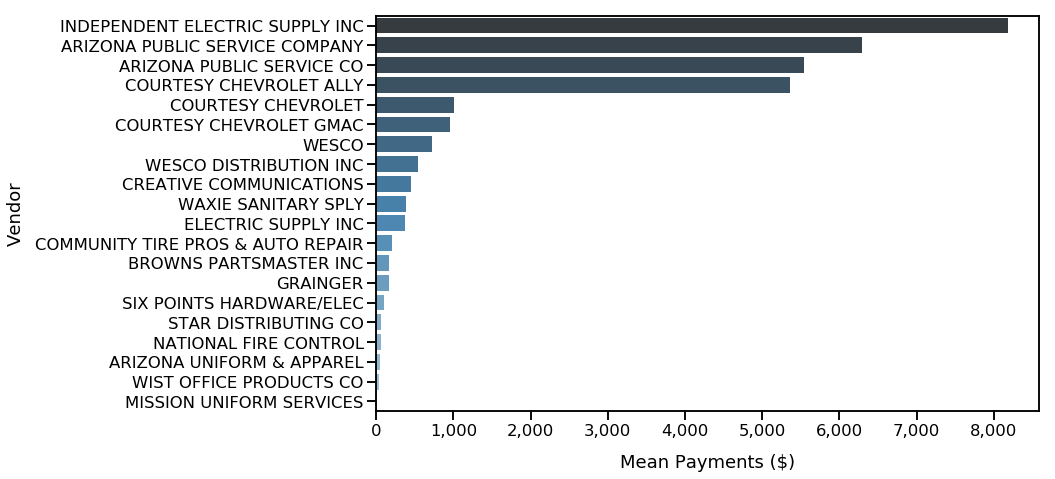

In [68]:
plt.subplots(figsize=(15,7))
sns.set_context("talk")

ax = sns.barplot(high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)
.values, high_volume_vendors_data.groupby('vendor_name')['invoice_net_amt'].mean().sort_values(ascending=False)
.index, palette=("Blues_d"))

# plt.title('City of Phoenix Mean Payments - Top Volume Vendors')
plt.ylabel('Vendor', labelpad=10)
plt.xlabel('Mean Payments ($)', labelpad=15)

ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()

# plt.savefig("visualizations/top_vendors_volume_mean_payments.png")

#### why are there two different names for APS above?
#### why does Phoenix use multiple uniform service companies?

#### (Note: for future analysis, using .agg() function to find a number of pieces of information for anything being grouped. Rather than group and perform one specific type of analysis)

In [10]:
x = payments.groupby('vendor_name')['invoice_net_amt'] \
    .agg(['mean', 'sum', 'min', 'max', 'std', 'count', 'var']) \
    .sort_values(by='sum', ascending=False) \
    .head(20)

# format data as currency with two decimal places
x.style.format('${0:,.2f}')

,mean,sum,min,max,std,count,var
vendor_name,,,,,,,
US BANK TRUST NATIONAL ASSOCIATION,"$1,234,439.39","$2,710,828,892.29",$12.13,"$55,205,000.00","$3,308,391.59","$2,196.00","$10,945,454,923,634.59"
VALLEY METRO RAIL INC,"$491,171.00","$440,089,213.38","$-285,366.00","$11,327,663.00","$983,850.93",$896.00,"$967,962,657,806.69"
TRANSDEV SERVICE INC,"$490,216.53","$437,763,357.49","$-6,995,662.64","$13,991,325.27","$1,480,997.33",$893.00,"$2,193,353,105,718.05"
HUNT AUSTIN A JOINT VENTURE,"$3,495,481.91","$426,448,793.30","$11,172.00","$12,692,493.00","$3,689,735.76",$122.00,"$13,614,149,944,589.21"
ARIZONA PUBLIC SERVICE CO,"$5,539.25","$227,059,316.99","$-2,077,817.01","$783,675.47","$28,523.81","$40,991.00","$813,607,965.09"
REGIONAL PUBLIC TRANSPORTATION,"$653,008.00","$216,798,657.33",$270.00,"$7,761,489.00","$889,807.27",$332.00,"$791,756,986,173.29"
FIRST TRANSIT INC,"$1,205,884.80","$151,941,484.91",$129.25,"$3,326,532.72","$1,148,916.08",$126.00,"$1,320,008,157,049.94"
CENTRAL ARIZONA PROJECT,"$582,561.57","$135,736,845.56","$-275,200.87","$2,207,920.77","$513,507.85",$233.00,"$263,690,310,970.23"
KIEWIT INFRASTRUCTURE WEST CO,"$550,545.21","$110,109,041.56","$1,362.54","$4,900,039.19","$615,564.46",$200.00,"$378,919,598,620.75"


### Which vendors are associated with the most identical payments? Aka, payments of the same amount, on the same day, for the same department, ect.

In [26]:
# format columns as list
list(payments.columns.values)

['check/payment_date',
 'commitmt_item_name',
 'dept._descrptn',
 'invoice_net_amt',
 'vendor_name',
 'day_of_year']

In [44]:
# group by all columns of the dataframe
# payments.groupby(list(payments.columns.values)).size().sort_values(ascending=False).reset_index().head(20)

payments[payments['invoice_net_amt'] > 5].groupby(list(payments.columns.values)).size().reset_index().head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,vendor_name,day_of_year,0
0,2014-01-02,3rd Party Relocation,Aviation,98598.20,SECURITY TITLE AGENCY,2,1
1,2014-01-02,A/C Chilled Wtr Svc,Phoenix Convention Center,14038.18,NRG THERMAL LLC,2,1
2,2014-01-02,A/C Chilled Wtr Svc,Phoenix Convention Center,39182.73,NRG THERMAL LLC,2,1
3,2014-01-02,A/C Chilled Wtr Svc,Phoenix Convention Center,57307.33,NRG THERMAL LLC,2,1
4,2014-01-02,A/C Chilled Wtr Svc,Phoenix Convention Center,64578.31,NRG THERMAL LLC,2,1


In [69]:
# exclude payments of less than $5
# find vendors that have the highest number of identical payments
identical_pay_group = payments[payments['invoice_net_amt'] > 5].groupby(['check/payment_date',
     'commitmt_item_name',
     'dept._descrptn',
     'invoice_net_amt',
     'vendor_name']).size().reset_index()


# .reset_index().apply(lambda x: x[0] > 50)

# .reset_index()


In [141]:
# how many vendors have more than 50 payments of the same amount on the same day?
# payment amounts are less than $1,000 (a few extreme outliers were proving troublesome)
identical_pay_group[(identical_pay_group[0] > 20) & (identical_pay_group['invoice_net_amt'] < 1000)].shape

(929, 6)

In [174]:
# glance at the data
identical_pay_group[(identical_pay_group[0] > 20) & (identical_pay_group['invoice_net_amt'] < 1000)].head()

,check/payment_date,commitmt_item_name,dept._descrptn,invoice_net_amt,vendor_name,0
1286,2014-01-02,Prop Management Cost,Aviation,174.39,BERRY REALTY & ASSOC,34
2769,2014-01-06,Rel Adv Svcs-TrnAsst,Aviation,50.33,NEIGHBORHOOD HOUSING SERVICES,203
2770,2014-01-06,Rel Adv Svcs-TrnAsst,Aviation,50.34,NEIGHBORHOOD HOUSING SERVICES,71
5155,2014-01-09,Motor Vehicle Repair,Public Works,19.99,AUTO GLASS & TINT DIRECT LLC,22
5158,2014-01-09,Motor Vehicle Repair,Public Works,45.00,AUTO GLASS & TINT DIRECT LLC,48


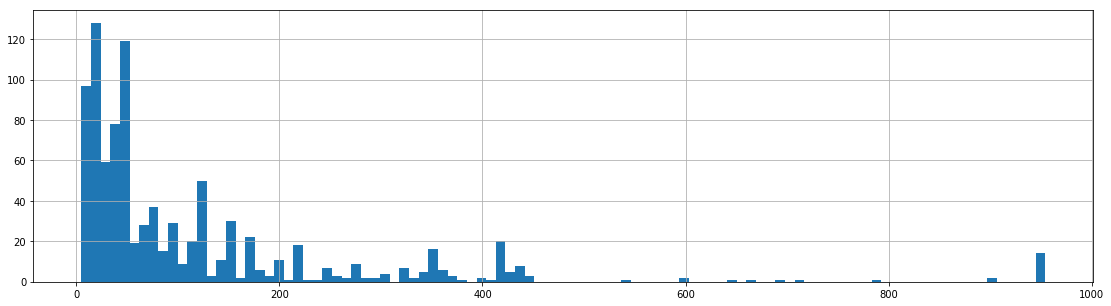

In [145]:
fig, ax = plt.subplots(figsize=(19, 5))
identical_pay_group[(identical_pay_group[0] > 20) & (identical_pay_group['invoice_net_amt'] < 1000)]['invoice_net_amt'].hist(bins=100)

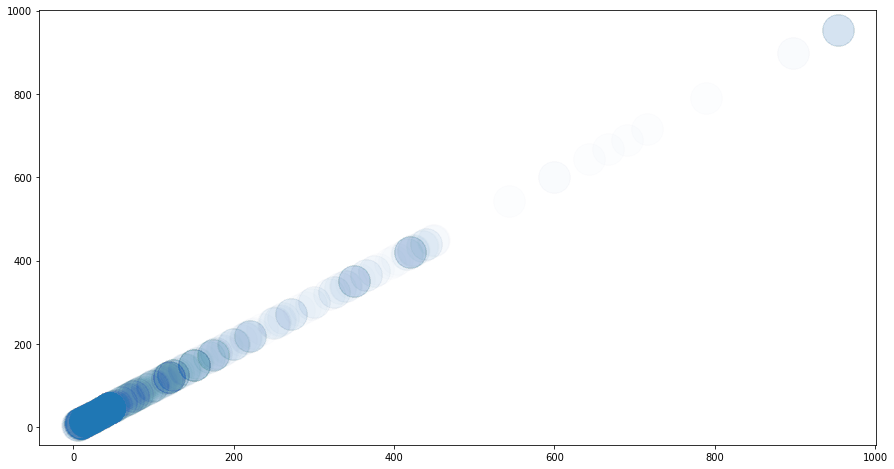

In [173]:
# fig, ax = plt.subplots(figsize=(15, 5))
plt.figure(figsize=(15, 8))

# graph idential payments on both x and y axis
plt.scatter(identical_pay_group[(identical_pay_group[0] > 20) 
                                & (identical_pay_group['invoice_net_amt'] < 1000)]['invoice_net_amt'],
            identical_pay_group[(identical_pay_group[0] > 20) 
                                & (identical_pay_group['invoice_net_amt'] < 1000)]['invoice_net_amt'],
           alpha=.01,
           s=1000)

In [185]:
# find top 5 vendors within above grouping 
identical_pay_group[(identical_pay_group[0] > 20) & (identical_pay_group['invoice_net_amt'] < 1000)] \
    ['vendor_name'].value_counts().head(5).index

Index(['CREATIVE COMMUNICATIONS', 'WESTERN TOWING', 'CITY WIDE PEST CONTROL',
       'EUROFINS EATON ANALYTICAL INC', 'COMMUNITY TIRE PROS & AUTO REPAIR'],
      dtype='object')

In [189]:
# subset payments data based on the payments of these top 5 vendors
id_payments_top_vendors = payments[payments['vendor_name'].isin(identical_pay_group[(identical_pay_group[0] > 20) & (identical_pay_group['invoice_net_amt'] < 1000)] \
    ['vendor_name'].value_counts().head(5).index)]

In [190]:
# how many rows?
id_payments_top_vendors.shape

(79833, 6)

In [209]:
payments[payments['vendor_name'] == 'CREATIVE COMMUNICATIONS']['invoice_net_amt'].shape

(22904,)

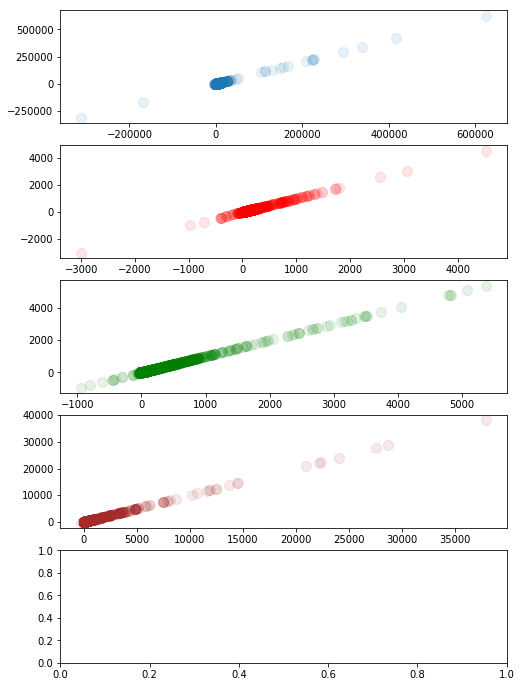

In [223]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,12))

ax[0].scatter(payments[payments['vendor_name'] == 'CREATIVE COMMUNICATIONS']['invoice_net_amt'],
                 payments[payments['vendor_name'] == 'CREATIVE COMMUNICATIONS']['invoice_net_amt'],
             alpha=.1, s=100)

ax[1].scatter(payments[payments['vendor_name'] == 'WESTERN TOWING']['invoice_net_amt'],
                 payments[payments['vendor_name'] == 'WESTERN TOWING']['invoice_net_amt'], c='red',
              alpha=.1, s=100)

ax[2].scatter(payments[payments['vendor_name'] == 'CITY WIDE PEST CONTROL']['invoice_net_amt'],
                 payments[payments['vendor_name'] == 'CITY WIDE PEST CONTROL']['invoice_net_amt'], 
              c='green',alpha=.1, s=100)

ax[3].scatter(payments[payments['vendor_name'] == 'EUROFINS EATON ANALYTICAL INC']['invoice_net_amt'],
                 payments[payments['vendor_name'] == 'EUROFINS EATON ANALYTICAL INC']['invoice_net_amt'], 
              c='brown',alpha=.1, s=100)

# ax[4].set_xlabel('Percent of Total Leading Digits')
# ax[4].xaxis.set_major_locator(ticker.MultipleLocator(10))


#### next steps
~~exclude invoices with leading digit of 0~~
1. which departments are most associated with duplicate payments? uniform cleaning?
1. are certain time of the year associated with high volumes of payments to certain vendors?
1. for vendors with more than 50 payments of the same amount on the same day . . .
    - do the leading digits correspond to Benford's law?
    - are thy provide similar goods/services?
1. for vendors with a high number of negative payments . . .
    - year over year, is the volume of negative payments about the same?
    - negative payments as a percentage of total payments
1. vendors with payments at specific times of the year(similar to what I did with the City of Scottsdale vendor payments).
1. vendors with payments within a tight range(essentially a low variance in payment amount).
1. group by dept. description and committment item name, within this combination
which vendors make up the largest share of the spending?
1. 